# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [41]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [43]:
# call_on_students(1)

#### Answer: 

- the first represents explains the greatest amount of variance in data
    - uses linear algrebra, eigenvectors & eigenvalues 
- reduces dimensionality while preserving as much information as possible



### 2: What are some reasons to use PCA?

In [44]:
# call_on_students(1)

#### Answer: 

- reduces dimensionality / # number of features
- addresses multicollinearity 
- helps with overfitting
- reduces run time


### 3: Why is scaling important for PCA?

In [45]:
# call_on_students(1)

#### Answer: 

- it uses the covariance matrix, which is scaled in square units of the original variables. This makes PCA very sensitive to the scale of the variables.
- its distance based, so units need to be on same scale 


### 4: How can one determine how many principle components to use in a model?

In [46]:
# call_on_students(1)

#### Answer: 

-  can say you want to use a certain number of components  

- can choose a percentage/proportion to explain a certain amout of variance usually 90-95% when instantiating for 'n_components'


## PCA in Code

### Set Up

In [47]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- make sure there is no nulls or categoricals
- scale the data


In [48]:
# call_on_students(1)

In [49]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
data_scaled = ss.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [50]:
# call_on_students(1)

In [51]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [52]:
# call_on_students(1)

In [53]:
# Code here to answer the question
pca.explained_variance_ratio_.sum()

0.6324320765155941

#### Answer:

- 63% of variance is explained by the first 2 components


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [54]:
# call_on_students(1)

#### Answer:

- pass it number of clusters, will create random centroids at this number
- assign datapoints to their closest centroid
- take all obvs assigned to each cluster (centroid)
- calculate the actual centroid of all those data points
- move our centroid points based on the calculation
- remeasure and reassign datapoints to their new closest centroid


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [55]:
# call_on_students(1)

#### Answer:


- measures the distance between each point and its center - the idea is that better clusters are more tightly concentrated 

- uses the sum of squared error calculated from each instance of 𝑘 to find the best value of 𝑘
- find the elbow of the curve, the number that provides the most value with the least complexity 


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [56]:
# call_on_students(1)

#### Answer:

- Silhouette Score: how tight the clusters are compared to how far apart the clusters (takes into account inter and intra)
	- metrics.silhouette_score
	- score -1 to 1 (1 being the best)


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [57]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?


- missing values must be dealt with, all data must be numerical (non-numerical dropped or OHE), scale


In [58]:
# call_on_students(1)

In [59]:
# Code to preprocess the data
# Name the processed data X_processed
scaled = StandardScaler()
X_processed = scaled.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [60]:
# call_on_students(1)

In [61]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2)

In [62]:
# Fit the object
cluster.fit(X_processed)

AgglomerativeClustering()

In [63]:
# Calculate a silhouette 
from sklearn.metrics import silhouette_score


In [64]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
silhouette_score(X_processed, cluster.labels_)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [66]:
# call_on_students(1)

In [67]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters = n)
    cluster.fit(data)
    
    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_
    

In [68]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475988
0.4466890410285909
0.4006363159855973
0.33058726295230545
0.31485480100512825
0.31696983029912795
0.31094652900725794


# 3) Time Series

In [82]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- make sure the month is actually a datetime object
- make sure datetime is the index


In [83]:
# call_on_students(1)

In [84]:
#pd.DataFrame(data=ap['#Passengers'].values, index=pd.to_datetime(ap['Month']),columns=['#Passengers'])

In [85]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [86]:
ap.index = pd.to_datetime(ap['Month'])
ap = ap.drop('Month',axis=1)
ap.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- Trends: 
    - linear, exoponential, periodic, seasonal, cyclical, irregular


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<AxesSubplot:xlabel='Month'>

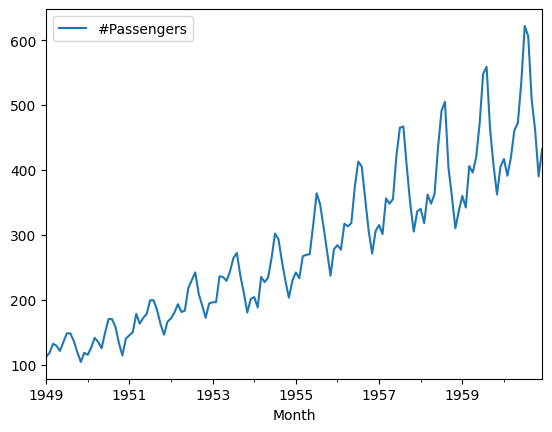

In [87]:
# Code to plot the time series
ap.plot()

#trending upwards, but has some seasonality 

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 12 month/yearly?


In [88]:
# call_on_students(1)

In [89]:
# Code to create the moving average
rolling_average = ap.rolling(12).mean()

In [90]:
rolling_average

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


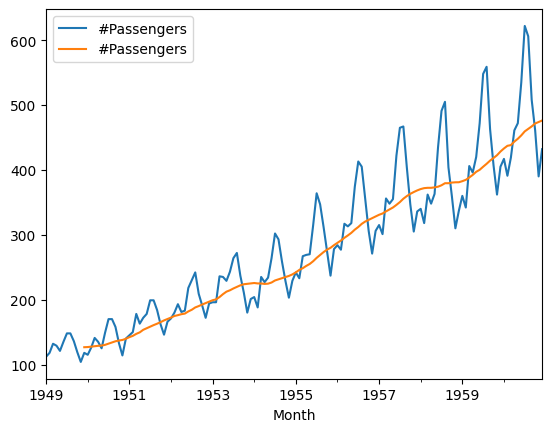

In [92]:
# Add to the moving average to the above plot
ax = ap.plot()
rolling_average.plot(ax=ax);

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- desire to remove noise in the data
- model performs better on stationary data because it helps the model focus on the part that actually needs predicting


What can we do to make our data stationary?

- subtract the rolling mean, 
- difference (substract previous value from current one)
- log transform or other straight mathematical transformation


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [99]:
# Code here to check if the data is stationary
#run dickey-fully test
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ap)
dftest

(0.8153688792060447,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [100]:
# Code here to try to make the data stationary
ap2 = ap.diff().dropna()
ap2

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [101]:
# Code here to check if the data is stationary
adfuller(ap2)

(-2.8292668241699794,
 0.054213290283828236,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [102]:
#still not stationary 

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [103]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. lower case all words 
2. remove punctuation and stopwords
3. stem or lem
4. tokenize

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- rows = documents
- columns = tokens (number of times the tokens)


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- term frequency-inverse document frequency
- use this for when you have multiple documents
- weighted rarity of tokens


## NLP in Code

### Set Up

In [104]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [105]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [107]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [108]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
# Instantiate it
cv = CountVectorizer()

In [110]:
# Fit it
cv.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [111]:
# Code here to transform train and test sets with the vectorizer
X_train_transformed = cv.transform(X_train)
X_test_transformed = cv.transform(X_test)

In [114]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [116]:
# Code here to evaluate your model on the test set

rfc_model.score(X_test_transformed, y_test)

0.9583333333333334